## Analyze A/B Test Results
You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page. Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric). **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons. The hope is to have this project be as comprehensive of these topics as possible. Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [51]:
#importing packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [52]:
df = pd.read_csv('ab_data.csv')
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


b. Use the cell below to find the number of rows in the dataset.

In [53]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [54]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [55]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [56]:
new_or_treat = ((df.group == 'treatment') |  (df.landing_page == 'new_page')).sum()
new_and_treat = ((df.group == 'treatment') &  (df.landing_page == 'new_page')).sum()
new_or_treat - new_and_treat

3893

f. Do any of the rows have missing values?

In [57]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [58]:
df1 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
df2 = df.drop(df1.index , axis = 0)

In [59]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [60]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [61]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [62]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [63]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [64]:
df2['user_id'] = df2['user_id'].drop_duplicates()
df2[df2['user_id'].duplicated()].sum()

user_id         0.0
timestamp       0.0
group           0.0
landing_page    0.0
converted       0.0
dtype: float64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [65]:
len(df2[df2['converted'] == 1]) / len(df2['converted'])

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [66]:
df_control = df2[df2['group'] == 'control']
len(df_control[df_control['converted'] == 1]) / len(df_control['converted'])

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [67]:
df_treatment = df2[df2['group'] == 'treatment']
len(df_treatment[df_treatment['converted'] == 1]) / len(df_treatment['converted'])

0.11880724790277405

d. What is the probability that an individual received the new page?

In [68]:
len(df2[df2['landing_page'] == 'new_page']) / len(df2['landing_page'])

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> if we looked at part b and c ,we can find that the probability of individual who sticked with control group is higher than the one with treatment group, so there is no high impact from the converting to treatment group, and that there isn't sufficient evidence says that the new treatment page leads to more conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> Null Hypotheses :        
> **$p_{old}$** >= **$p_{new}$**     

> Alternative Hypotheses :  
>**$p_{old}$ < $p_{new}$**    



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [69]:
#𝑝𝑜𝑙𝑑  =  𝑝𝑛𝑒𝑤 = converted 
p_new = len(df2[df2['converted'] == 1]) / len(df2['converted'])
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? 

In [70]:
#from hints
p_old = p_new 
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [71]:
n_new = len(df2[df2['group'] == 'treatment'].drop_duplicates())
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [72]:
n_old = len(df2[df2['group'] == 'control'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

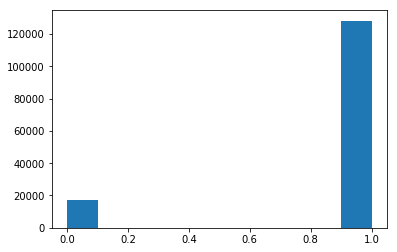

In [73]:
new_page_converted = np.random.choice([0,1], n_new, p =(p_new, 1-p_new))
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

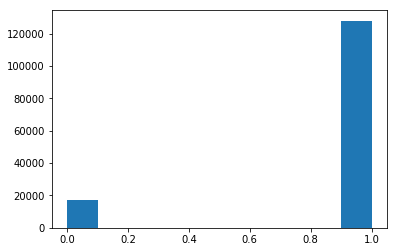

In [74]:
old_page_converted = np.random.choice([0,1], n_old, p =(p_old, 1-p_old))
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [75]:
new_page_converted.mean() - old_page_converted.mean()

0.00044307024071554846

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [76]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1- p_new)]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1- p_old)]).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

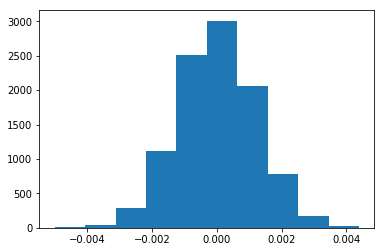

In [77]:
plt.hist(p_diffs);

>it's normally distributed as we increased the sample size to 10,000, which make it closer to the population distribution

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [78]:
actual_diff = df.query('group == "treatment"')["converted"].mean() - df.query('group == "control"')["converted"].mean()
actual_diff

-0.0014795997940775518

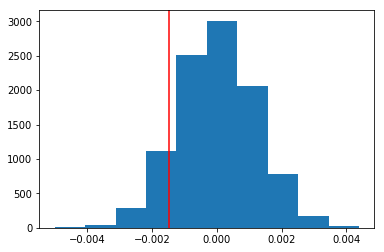

In [79]:
plt.hist(p_diffs);
plt.axvline(actual_diff, color = 'red')

In [80]:
#calculating p_value
p_value = (p_diffs > actual_diff).mean()
p_value

0.89290000000000003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>we will consider that our confidence intervel is 95% so the signeficant level(alpha) = 0.05 and the area that is not included in 95% interval(p_value) = 0.8, so p_value > alpha, then we fail to reject the null hyposthis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [81]:
import statsmodels.api as sm

convert_old = sum(df.query('group == "control"')["converted"])
convert_new = sum(df.query('group == "treatment"')["converted"])
n_old = len(df.query('group == "control"'))
n_new = len(df.query('group == "treatment"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [82]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative = 'larger')

In [83]:
z_score, p_value

(-1.2369217547321678, 0.89194193365121244)

In [84]:
lower, upper = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)

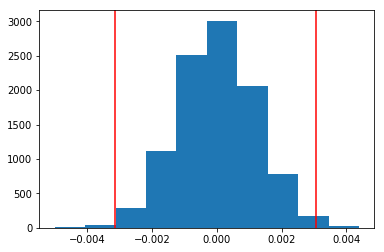

In [85]:
plt.hist(p_diffs);
plt.axvline(lower, color = 'red')
plt.axvline(upper, color = 'red')

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>we are -1.2369 standard deviations below the mean, also the p_value of the two methods are close to each other so both of each methods fail to reject the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [86]:
df2['intercept'] = 1

df2[['treatment','control']] = pd.get_dummies(df2['group'])

In [87]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control
0,851104.0,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [88]:
logit_mod = sm.Logit(df2["converted"], df2[['intercept', 'treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [89]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-05 11:29 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1467  0.0000  -2.0197  -1.9879
treatment     0.0150    0.0114     1.3116  0.1897  -0.0074   0.0374
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>as a rule of thump : A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. 

>and in the last method we failed to reject null hypothesis because the p_value was 0.893 approximattly, and here after applying LR we can see that treatment's p_value is 0.1897	which means that we can't consider the alternative hypothesis, which means also rejecting H0


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

advantages
>some problems may have number of factors that have correlation with the dependent variable which might give a relible output

disadvantages:
>adding to much factors will make the model more complex which consuming more time and computational power

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [90]:
countries = pd.read_csv('countries.csv')

joined_dfs = df2.join(countries.set_index('user_id'), on='user_id', how = 'inner')
joined_dfs.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control,country
0,851104.0,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228.0,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590.0,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US


In [91]:
joined_dfs['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [92]:
joined_dfs['intercept'] = 1

joined_dfs[['US','CA','UK']] = pd.get_dummies(joined_dfs['country'])
logit_mod = sm.Logit(joined_dfs["converted"], joined_dfs[['intercept','US','CA']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-05 11:29 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
US           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
CA            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [93]:
#to make it more easy to interpret, we will get the exponent for the coeffecients
#we will neglect the intercept coef.
pd.DataFrame([["US",np.exp(-0.0408)]
              ,["CA",np.exp(0.0099)]],columns = ['columns','exponent'])

,columns,exponent
0,US,0.960021
1,CA,1.009949


we could now interpert the coefs by saying for example:

>for every 1 unit increase in CA ,it's 1.009949 likely that the page is converted, holding all else are constant

In [94]:
#for values less than 1 we will get the reciprocal
#reciprocal make it decrease not increase
pd.DataFrame([["US",1/np.exp(-0.0408)]],columns = ['columns','reciprocal'])

,columns,reciprocal
0,US,1.041644


>for every 1 unit decrease in US ,it's 1.041644 likely that the page is converted, holding all else are constant

**Does it appear that country had an impact on conversion?** 

>it seems that countries had no impact as p_value for both countries are bigger than alpha, so they are not statistically significant 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [95]:
joined_dfs['landing_page'].unique()

array(['old_page', 'new_page'], dtype=object)

In [96]:
joined_dfs[['old_page','new_page']] = pd.get_dummies(joined_dfs['landing_page'])

joined_dfs['US_new_page'] = joined_dfs['US']*joined_dfs['new_page']
joined_dfs['CA_new_page'] = joined_dfs['CA']*joined_dfs['new_page']

logit_mod = sm.Logit(joined_dfs["converted"], joined_dfs[['intercept','US_new_page','CA_new_page','US','CA']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-05 11:29 AIC:              212782.9259
No. Observations:   290584           BIC:              212835.8241
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
US_new_page   0.0674    0.0520     1.2967  0.1947  -0.0345   0.1694
CA_new_page  -0.0108    0.0228    -0.4749  0.6349  -0.0555   0.0339
US           -0.0747    0.0377    -1.9796  0.0477  -0.1487  -0.0007
CA            0.0153    0.0175     0.8759  0.3811  -0.0190   0.0497
==================================================================

"""

In [97]:
#we will neglect the intercept coef.
pd.DataFrame([["US_new_page",np.exp(0.0674)]
              ,["CA_new_page",np.exp(0.0108)]
              ,["CA",np.exp(0.0153)]],columns = ['columns','exponent'])

,columns,exponent
0,US_new_page,1.069723
1,CA_new_page,1.010859
2,CA,1.015418


we could now interpert the coefs by saying for example:

>for every 1 unit increase in US_new_page ,it's 1.069723 likely that the page is converted, holding all else are constant

>for every 1 unit increase in CA_new_page ,it's 1.010859 likely that the page is converted, holding all else are constant

>for every 1 unit increase in CA ,it's 1.015418 likely that the page is converted, holding all else are constant

In [98]:
#for values less than 1 we will get the reciprocal
pd.DataFrame([["US",1/np.exp(-0.0747)]],columns = ['columns','reciprocal'])

,columns,reciprocal
0,US,1.077561


>for every 1 unit decrease in US ,it's 1.077561 likely that the page is converted, holding all else are constant

in the second log regression trial all features are not statistically signficant also except US which can be included with intercept as it = 0.047, but won't make a remarkable difference

adding country or landing_page features won't be statistically signficant, also adding combained features won't make difference 

## to sum up

- in part I , we found that the probability of old_page is slightly better than the new_page

- in part II , we fail to reject the null hypostheses which was **$p_{old}$** >= **$p_{new}$**  because p_value was higher than alpha

- in part III ,we got the same results but with a regression approach, and we choose logistic reg. , also we found that adding some features to the model won't make a difference and they will remain not-statistically signficant

we should also consider happening of two things : **change aversion** and **novelty effect**

>as some users would be unhappy with changes and want to stick with the old version so they give unfair advantage for it and this is change aversion , and vice versa for novelty effect

>also we should consider the time and money consumed in these processes, so we should choose the effective and the less time and money consuming method  

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0